In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.0 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.0 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.0 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.3 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 1.3 MB/s eta 0:00:05
   --------------- ------------------------ 3.1/8.0 MB 1.6 MB/s eta 0:00:04
   -------------------- ------------------- 4.2/8.0 MB 1.9 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.0 MB 2.3 MB/s eta 0:00:02
   -----------------------

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [5]:
# Tải dữ liệu MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Thêm một kênh (channel) để phù hợp với định dạng yêu cầu của CNN
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Chuẩn hóa dữ liệu (từ 0-255 về 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0


# Mục mới

In [6]:
'''model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
'''
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

##**Sử dụng epochs=20 và vẽ thử biểu đồ**

In [7]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Thiết lập bộ nhớ GPU linh hoạt (tùy chọn)
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU sẵn sàng và đã được cấu hình.")
    except RuntimeError as e:
        print(e)
else:
    print("Không tìm thấy GPU. Sử dụng CPU thay thế.")


Physical devices cannot be modified after being initialized


In [ ]:
optimizer = Adam(learning_rate=0.05)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',


              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3078 - accuracy: 0.1032 - val_loss: 2.3063 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3072 - accuracy: 0.1025 - val_loss: 2.3083 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3078 - accuracy: 0.1045 - val_loss: 2.3072 - val_accuracy: 0.1010
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3075 - accuracy: 0.1027 - val_loss: 2.3054 - val_accuracy: 0.0982
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3075 - accuracy: 0.1056 - val_loss: 2.3202 - val_accuracy: 0.0958
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3079 - accuracy: 0.1041 - val_loss: 2.3064 - val_accuracy: 0.0980
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3074 - accuracy: 0.1038 - val_loss: 2.3107 - val_accuracy:

ValueError: x and y must have same first dimension, but have shapes (20,) and (13,)

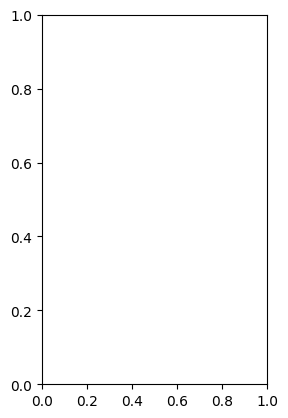

In [15]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,20+1)

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, marker='o', linestyle='-', color='b',label='Accuracy')
plt.plot(epochs_range, val_acc,  marker='o', linestyle='-', color='r',label='val_acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, marker='o', linestyle='-', color='b',label='Loss')
plt.plot(epochs_range, val_loss,  marker='o', linestyle='-', color='r',label='val_loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
 264/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9947 - loss: 0.0341

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

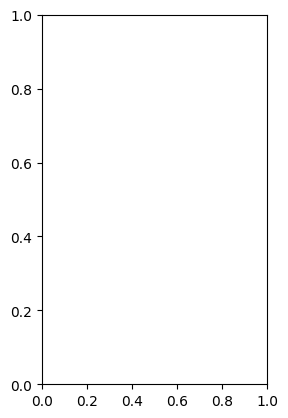

In [11]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,10+1)

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, marker='o', linestyle='-', color='b',label='Accuracy')
plt.plot(epochs_range, val_acc,  marker='o', linestyle='-', color='r',label='val_acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, marker='o', linestyle='-', color='b',label='Loss')
plt.plot(epochs_range, val_loss,  marker='o', linestyle='-', color='r',label='val_loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


In [ ]:
predictions = model.predict(test_images)

# Dự đoán cho hình ảnh đầu tiên trong tập test
print(predictions[0])
print(f'Dự đoán: {tf.argmax(predictions[0])}')


In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Dự đoán: {tf.argmax(predictions[i])}')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Define the encode dictionary
encode = {
    0: 'Class 0',
    1: 'Class 1',
    2: 'Class 2',
    3: 'Class 3',
    4: 'Class 4',
    5: 'Class 5',
    6: 'Class 6',
    7: 'Class 7',
    8: 'Class 8',
    9: 'Class 9'
}

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
# test_labels is likely already an array of class indices, so we don't need argmax
y_answer = test_labels
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_answer, y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt='.1f', ax=ax,
            xticklabels=list(encode.values()), yticklabels=list(encode.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Giả sử bạn đã huấn luyện xong mô hình với tên biến là "model"
model.save('/content/drive/MyDrive/your_model_name.keras')
